In [12]:
!git clone https://github.com/MikolajMezyk/projektML.git
%cd projektML

Cloning into 'projektML'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 5), reused 9 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 324.49 KiB | 5.23 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/projektML/projektML


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df = df.drop(columns=["customerID"])


In [16]:
numeric_cols = ["TotalCharges",  "MonthlyCharges", "tenure"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # nieprawidłowe wartości -> NaN

print("Ilość Nan:")
print( df[numeric_cols].isna().sum())

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


Ilość Nan:
TotalCharges      11
MonthlyCharges     0
tenure             0
dtype: int64


In [17]:
replace_map = {
    "No internet service": "No",
    "No phone service": "No"
}

for col in [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"
]:
    df[col] = df[col].replace(replace_map)

In [18]:
da= df.copy()

for col in [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "Partner", "PhoneService", "Dependents",
    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines", "PaperlessBilling"
]:
    da[col] = da[col].map({"Yes": 1, "No": 0})

da["Churn"] = da["Churn"].map({"Yes": 1, "No": 0})

In [19]:
da.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


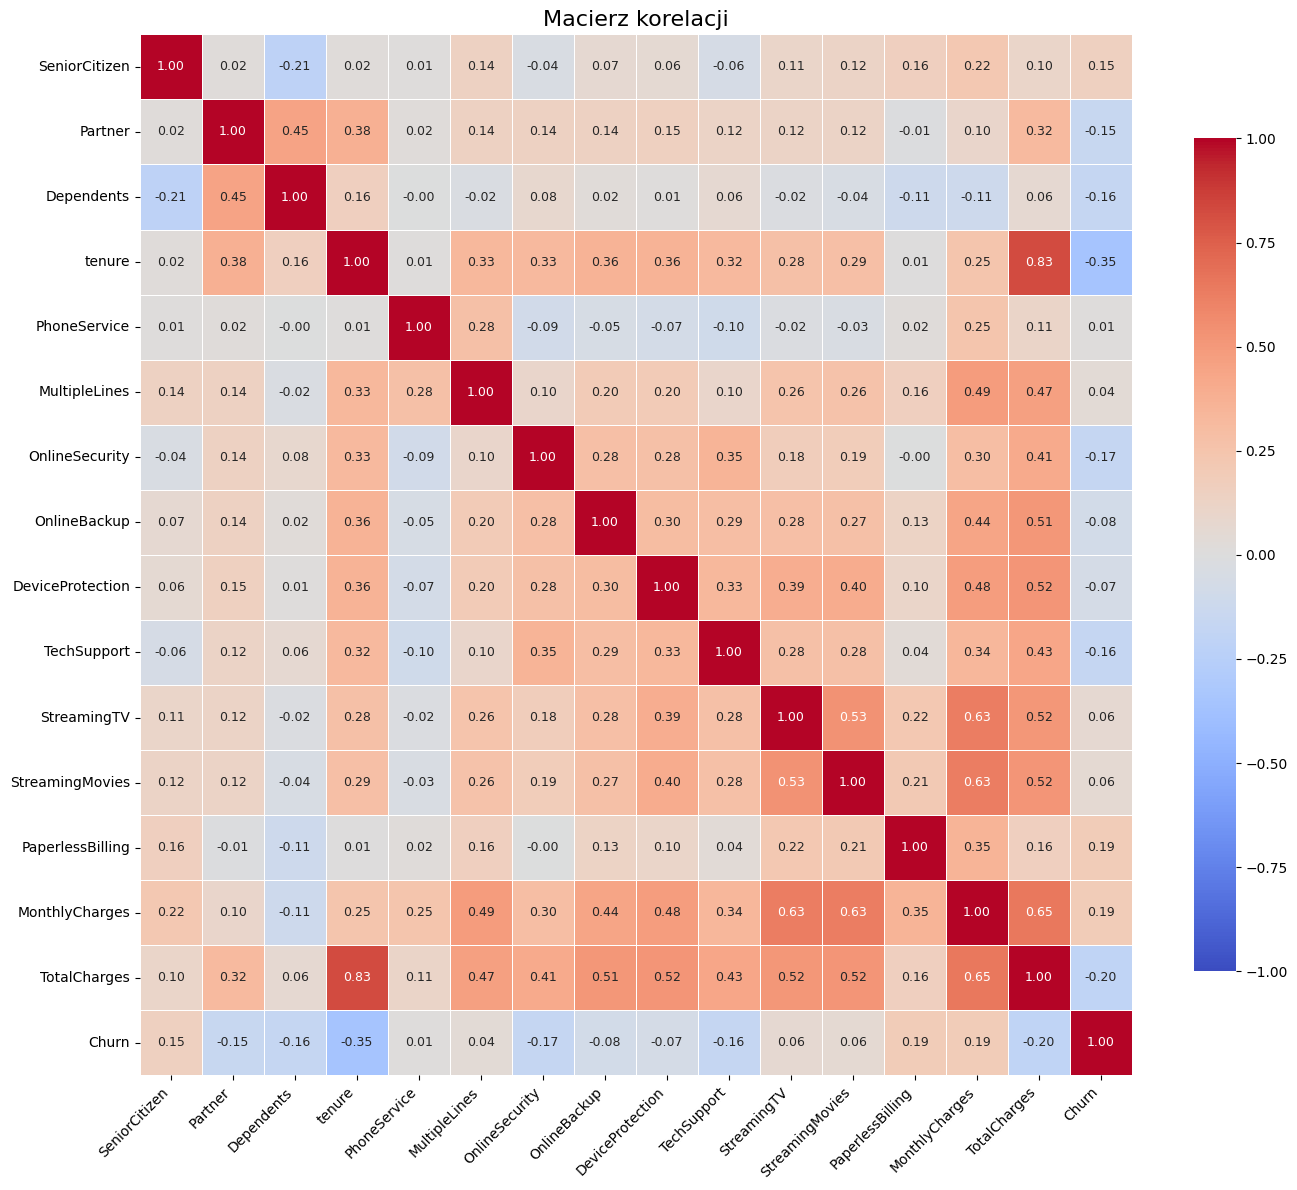

In [23]:
corr = da.corr(numeric_only=True)

# maska – pokazujemy tylko dolny trójkąt
#mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    #mask=mask,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)

plt.title("Macierz korelacji", fontsize=16)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



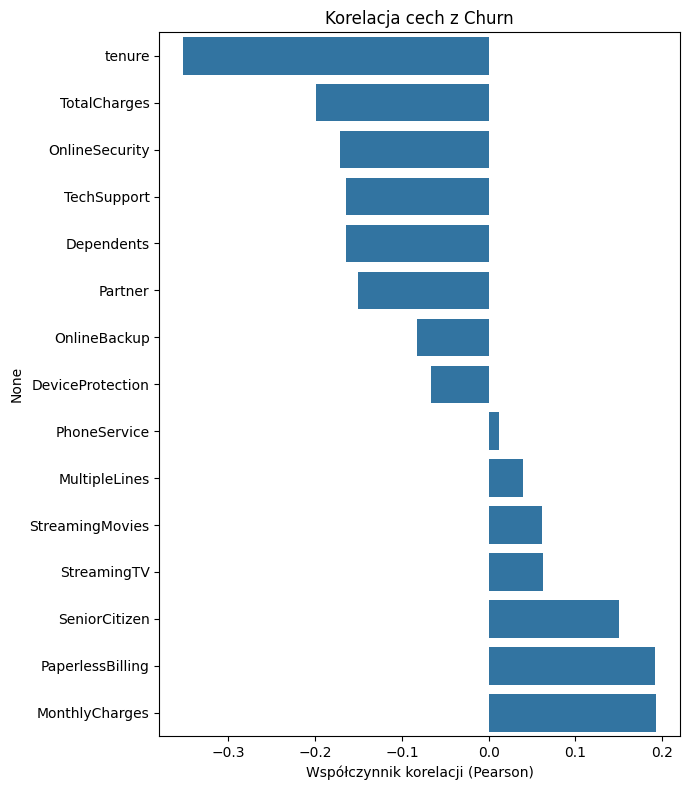

In [21]:


corr = da.corr(numeric_only=True)

ch = corr["Churn"].drop("Churn").sort_values()

plt.figure(figsize=(7, 8))
sns.barplot(x=ch.values, y=ch.index)
plt.title("Korelacja cech z Churn")
plt.xlabel("Współczynnik korelacji (Pearson)")
plt.tight_layout()
plt.show()


Najsilniejsza zależność z Churnem występuje z **tenure** (korelacja ≈ -0,35)  
-> im dłużej klient jest z firmą tym mniejsze ppb churnu  

Churn na też umierkowaną korelację z:
- SeniorCitizen (+0,15) - ???
- Partner (-0,15)
- Dependents (-0,16)
- OnlineSecurity (-0,17)
- TechSupport (-0,16)
- TotalCharges (-0,20) - "dużo zapłacił klient łącznie" = długo jest z firmą
- MonthlyCharges (+0,19) - wyższe połaty -> wyższe ppb churnu
- PaperlessBilling (+0,19)  - ???

->


Dodawkowo większość z nich jest umiarkowanie skorelowana z **tenure**
- SeniorCitizen (+0,02)
- Partner (+0,38)
- Dependents (+0,16)
- OnlineSecurity (+0,33)
- TechSupport (+0,32)
- TotalCharges (+0,83)
- MonthlyCharges (+0,25)
- PaperlessBilling (+0,01)  

-> klienci długo letni częściej posiadają usługi dodatkowe, generują łącznie wyższe przychody, rzadziej odchodzą


Dodatkowo   
tenure <-> TotalCharges = 0,83  
TotalCharges <-> MonthlyCharges = 0,65

Oraz MonthlyCharges jak i TotalCharges są mocno skorelowane z usługami

Partner <-> Dependents = 0,45
- Partner <-> **tenure** = 0,38
- Dependents <-> **tenure** = 0,16